In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Upload dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Read the dataset as a pandas dataframe
data = pd.read_excel('gdrive/My Drive/Stock Predicting/Dataset.xlsx')
data.head(5)

,x,y
0,1,8
1,2,21
2,3,50
3,4,101
4,5,180


In [4]:
#Separate X(features) and Y(label), and convert into array
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)

In [5]:
#Check the shape of X
X.shape

(100, 1)

In [6]:
#Splitting dataset into train and test (80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [23]:
class LinearRegression():
    def __init__(self, epochs, alpha):
        ''' constructor '''
        #Input hyperparameters
        self.epochs = epochs
        self.alpha = alpha
        #Initial values for w and b
        self.w = None
        self.b = 0
        
    def forward_propagation(self,X,w,b):
      # n: features, m = number of data
      #X -> n x m
      #w -> 1 x n
      #b and z -> 1 x m
      z = (np.dot(w,X))+b
      return z

    def cost_function(self,z,y):
      # y -> 1 x m
      # z -> 1 x m
      m = y.shape[1]
      J = (1/(2*m))*np.sum(np.square(z-y))
      return J
    
    def back_propagation(self,X,y,z):
      #y -> 1 x m
      #z -> 1 x m
      #dz -> 1 x m
      #X.T -> m x n
      #dw -> 1 x n
      m = y.shape[0]
      dz = (1/m)*(z-y)
      dw = np.dot(dz,X.T)
      db = np.sum(dz)
      return dw,db
    
    def gradient_descent(self,w,b,dw,db,alpha):
      w = w - self.alpha*dw
      b = b - self.alpha*db
      return w,b
    
    def fit(self, X_train, y_train, X_val, y_val, alpha, epochs):
        ''' function to train the tree '''
        #Store the number of data
        m_train = y_train.shape[1]
        m_val = y_val.shape[1]

        #Store the number of features
        num_features = X_train.shape[1]
        print(num_features)

        #Initialize parameters w and b
        self.w = np.random.randn(1,num_features)
        self.b = 0

        #Transpose y_train
        Y_train = y_train.T
        X_train = X_train.T

        #Variable for cost function plotting
        cost = []
        counter = []

        #Gradient Descent Algorithm
        for i in range(1,self.epochs+1):
          z_train = self.forward_propagation(X_train,self.w,self.b)
          cost_train = self.cost_function(z_train,Y_train)
          print(z_train.shape)
          print(Y_train.shape)
          dw,db = self.back_propagation(X_train,Y_train,z_train)
          self.w,self.b = self.gradient_descent(self.w,self.b,dw,db,alpha)

          #Calculate Root Mean Square Error Value
          rms = mean_squared_error(Y_train, z_train, squared=False)
          print(rms)

          #For visualization
          cost.append(cost_train)
          counter.append(i)

          #print epochs dkk
          print('Epochs '+str(i)+'/'+str(epochs)+': ')
          print('Training Cost '+str(cost_train))
          print('Root Mean Square Error '+str(rms))

        #Visualization Cost Function
        #plt.scatter(counter, cost, color = 'black')
        #plt.title('Minimize Cost Funtion')

        #Visualization Accuracy
        plt.scatter( X_train, Y_train, color = 'blue' )
        #print(z_train)
        plt.scatter( X_train, z_train, color = 'red' )
        plt.title('Accuracy')
        plt.show()


    
    
    def predict(self, X_test, y_test):
        m_test = y_test.shape[1]
        X_test = X_test.T
        Y_test = y_test.T
        z_test = self.forward_propagation(X_test,self.w,self.b)
        print(z_test.shape)
        print(Y_test.shape)
        cost_test = self.cost_function(z_test,Y_test)
        rms = mean_squared_error(Y_test, z_test, squared=False)
        print('Test Cost '+str(cost_test))
        print('Root Mean Square Error '+str(rms))

        #Visualization Accuracy
        plt.scatter( X_test, Y_test, color = 'blue' )
        #print(z_train)
        plt.scatter( X_test, z_test, color = 'red' )
        plt.title('Accuracy')
        plt.show()

In [24]:
#define hyperparameters
alpha = 10e-7
epochs = 100

1
(1, 80)
(1, 80)
272360.1694296699
Epochs 1/100: 
Training Cost 81570345403.27315
Root Mean Square Error 272360.1694296699
(1, 80)
(1, 80)
195457.92931958387
Epochs 2/100: 
Training Cost 48331476101.46357
Root Mean Square Error 195457.92931958387
(1, 80)
(1, 80)
158538.18099092436
Epochs 3/100: 
Training Cost 31087799490.50554
Root Mean Square Error 158538.18099092436
(1, 80)
(1, 80)
142101.5670651211
Epochs 4/100: 
Training Cost 22142066042.61255
Root Mean Square Error 142101.5670651211
(1, 80)
(1, 80)
135112.63498892754
Epochs 5/100: 
Training Cost 17501117294.66
Root Mean Square Error 135112.63498892754
(1, 80)
(1, 80)
133080.36961756874
Epochs 6/100: 
Training Cost 15093393210.291712
Root Mean Square Error 133080.36961756874
(1, 80)
(1, 80)
132960.0783526649
Epochs 7/100: 
Training Cost 13844215430.545115
Root Mean Square Error 132960.0783526649
(1, 80)
(1, 80)
133412.8588062447
Epochs 8/100: 
Training Cost 13196065199.046524
Root Mean Square Error 133412.8588062447
(1, 80)
(1, 80

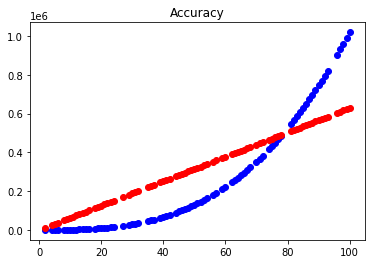

In [25]:
regressor = LinearRegression(epochs,alpha)
regressor.fit(X_train, y_train, X_test, y_test, alpha, epochs)

(1, 20)
(1, 20)
Test Cost 10937143970.176174
Root Mean Square Error 126037.74801369249


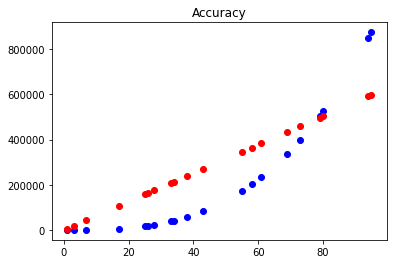

In [26]:
regressor.predict(X_test,y_test)